In [8]:
# Some necessary imports
import numpy as np

from ikpy.chain import Chain
from ikpy.utils import plot

# Optional: support for 3D plotting in the NB
%matplotlib widget
# %matplotlib inline
# turn this off, if you don't need it

7


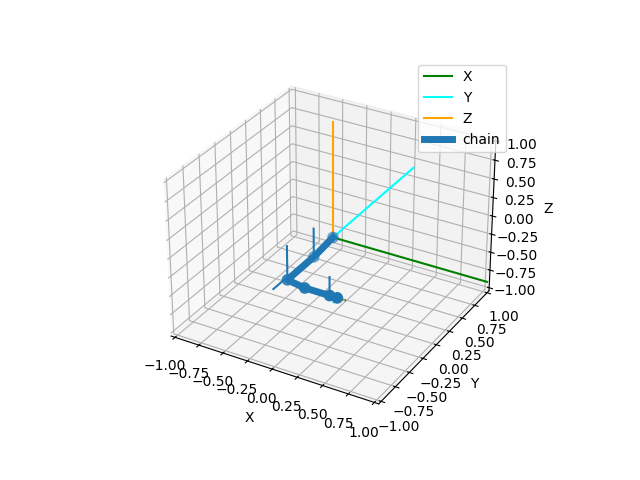

In [20]:
DRV_chain = Chain.from_urdf_file("../resources/DRV90_fixJ4.urdf")
# DRV_chain = Chain.from_urdf_file("../resources/DRV90ASS_test.urdf")

print(len(DRV_chain))
# Let's how it looks without kinematics first
from mpl_toolkits.mplot3d import Axes3D;
fig, ax = plot.init_3d_figure();
DRV_chain.plot([0] * (len(DRV_chain)), ax)
ax.legend()

In [7]:
real_frame = DRV_chain.forward_kinematics([0] * (len(DRV_chain)))
t = [0]
print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], t))

Computed position vector : [ 4.60006328e-01 -8.49965043e-01 -5.60966450e-06], original position vector : [0]
